# Assignment 1
## Question `1` (K-Nearest Neighbour)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

### Instructions:
1.   Assignment must be implemented using python notebook only (Colab , VsCode , Jupyter etc.)
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for algorithms as well (sklearn etc). You are not however allowed to directly use classifier models.
3.   The performance of the model will hold weightage but you will also be graded largely for data preprocessing steps , explanations , feature selection for vectors etc.
4.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

### The Dataset
The dataset is avaible in the zip file which is a collection of *11099 tweets*. The data will be in the form of a csv file. The ground truth is also given in the zip file which corresponds to whether a tweet was popular or not. Since the task involves selecting features yourself to vectorize a tweet , we suggest some data analysis of the columns you consider important.
<br><br>

### The Task
You have to build a classifier which can predict the popularity of the tweet, i.e , if the tweet was popular or not. You are required to use **KNN** algorithm to build the classifier and cannot use any inbuilt classifier. All columns are supposed to be analyzed , filtered and preprocessed to determine its importance as a feature in the vector for every tweet (Not every column will be useful).<br>
The Data contains the **raw text of the tweet**(in the text column) as well as other **meta data** like likes count , user followers count. Note that it might be useful to **create new columns** with useful information. For example, *number of hashtags* might be useful but is not directly present as a column.<br>
There are 3 main sub parts:
1. *Vectorize tweets using only meta data* - likes , user followers count , and other created data
2. *Vectorize tweets using only it's text*. This segment will require NLP techniques to clean the text and extract a vector using a BoW model. Here is a useful link for the same - [Tf-Idf](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d). Since these vectors will be very large , we recommend reducing their dimensinality (~10 - 25). Hint: [Dimentionality Reduction](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491). Please note that for this also you are allowed to use libraries.

3. *Combining the vectors from above two techinques to create one bigger vector*
<br>


Using KNN on these vectors build a classifier to predict the popularity of the tweet and report accuracies on each of the three methods as well as analysis. You can use sklearn's Nearest Neighbors and need not write KNN from scratch. (However you cannot use the classifier directly). You are expected to try the classifier for different number of neighbors and identify the optimal K value.

## Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import re
import ast



## Load and display the data

In [4]:
#your code here
dataset=pd.read_csv('Tweets.csv')
dataset1=pd.read_csv('ground_truth.csv',header=None)
dataset1.columns = ["y"]
dataset1.head()
dataset
# dataset.info()

,created_at,id,id_str,text,truncated,entities,metadata,source,is_quote_status,retweet_count,...,lang,user_name,user_screen_name,user_followers_count,user_friends_count,user_listed_count,user_created_at,user_favourites_count,user_verified,user_statuses_count
0,Tue Jul 31 13:34:34 +0000 2018,1.024290e+18,1.024290e+18,RT @EdwardTHardy: The 7th US Circuit Court of ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,113,...,en,Sherry Wahl,queenfancygirl,153,264,7,Thu Mar 18 19:16:31 +0000 2010,32984,False,31308
1,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,RT @VenomMovie: The world has enough superhero...,False,"{'hashtags': [{'text': 'Venom', 'indices': [64...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5902,...,en,Kay Khairil ðŸŒ,ikaykhairil,780,382,12,Wed Mar 17 03:27:51 +0000 2010,6648,False,87272
2,Tue Jul 31 13:34:40 +0000 2018,1.024290e+18,1.024290e+18,RT @FutbolBible: Teachers vs Students match &a...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,3745,...,en,Charlie Hamilton,ch100897,255,246,1,Sun Mar 03 09:23:03 +0000 2013,5426,False,1731
3,Tue Jul 31 13:34:27 +0000 2018,1.024290e+18,1.024290e+18,RT @mashable: Someone from 'The Office' actual...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,10,...,en,Mike Santos,mikesantosx71,2419,2428,4,Thu May 25 14:37:29 +0000 2017,5993,False,2153
4,Tue Jul 31 13:34:28 +0000 2018,1.024290e+18,1.024290e+18,RT @_missj0hnson: Iâ€™m at Starbucks asking fo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,25306,...,en,Soots,DaAverageDingus,314,722,7,Tue Mar 15 01:14:02 +0000 2011,6285,False,33503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,Tue Jul 31 13:34:36 +0000 2018,1.024290e+18,1.024290e+18,RT @AnnieOakley2015: @AVoiceForAllGA Following...,False,"{'hashtags': [{'text': 'GA10', 'indices': [93,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5,...,en,TrumpNeck,Francis_3,802,1353,7,Thu May 28 12:02:54 +0000 2009,79149,False,6491
11095,Tue Jul 31 13:34:15 +0000 2018,1.024290e+18,1.024290e+18,RT @BillOReilly: What exactly is Donald Trump ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,8393,...,en,atm,allen_mcdowell,429,599,12,Wed Oct 10 11:37:34 +0000 2012,2029,False,5065
11096,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,"Paradoxically, your good intentions may stand ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.twittascope.com"" rel=""nofo...",False,0,...,en,Jan15î„… .,yellow_naeeeee,135,94,0,Mon Sep 23 22:37:49 +0000 2013,90,False,4265
11097,Tue Jul 31 13:34:35 +0000 2018,1.024290e+18,1.024290e+18,RT @enblocibc: Less than 4 days to go for the ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,18,...,en,âœ¨MC Capital Venturesâœ¨,MCCapitalV,505,243,8,Thu Feb 01 23:58:16 +0000 2018,15829,False,13604


## Exploratory Data Analysis
*This is an ungraded section but is recommended to get a good grasp on the dataset*

In [5]:
print(dataset.info())
horizontal_concat = pd.concat([dataset, dataset1], axis=1)
print()
print("corelation")
print(horizontal_concat[horizontal_concat.columns[1:]].corr()['y'][:-1])
# df.dtypes
dataset['hashtags'] = dataset['entities'].apply(lambda x: ast.literal_eval(x).get('hashtags'))
dataset['num_hashtags'] = dataset['hashtags'].str.len()
dataset
    



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   created_at             11099 non-null  object 
 1   id                     11099 non-null  float64
 2   id_str                 11099 non-null  float64
 3   text                   11099 non-null  object 
 4   truncated              11099 non-null  bool   
 5   entities               11099 non-null  object 
 6   metadata               11099 non-null  object 
 7   source                 11099 non-null  object 
 8   is_quote_status        11099 non-null  bool   
 9   retweet_count          11099 non-null  int64  
 10  favorite_count         11099 non-null  int64  
 11  lang                   11099 non-null  object 
 12  user_name              11099 non-null  object 
 13  user_screen_name       11099 non-null  object 
 14  user_followers_count   11099 non-null  int64  
 15  us

,created_at,id,id_str,text,truncated,entities,metadata,source,is_quote_status,retweet_count,...,user_screen_name,user_followers_count,user_friends_count,user_listed_count,user_created_at,user_favourites_count,user_verified,user_statuses_count,hashtags,num_hashtags
0,Tue Jul 31 13:34:34 +0000 2018,1.024290e+18,1.024290e+18,RT @EdwardTHardy: The 7th US Circuit Court of ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,113,...,queenfancygirl,153,264,7,Thu Mar 18 19:16:31 +0000 2010,32984,False,31308,[],0
1,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,RT @VenomMovie: The world has enough superhero...,False,"{'hashtags': [{'text': 'Venom', 'indices': [64...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5902,...,ikaykhairil,780,382,12,Wed Mar 17 03:27:51 +0000 2010,6648,False,87272,"[{'text': 'Venom', 'indices': [64, 70]}]",1
2,Tue Jul 31 13:34:40 +0000 2018,1.024290e+18,1.024290e+18,RT @FutbolBible: Teachers vs Students match &a...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,3745,...,ch100897,255,246,1,Sun Mar 03 09:23:03 +0000 2013,5426,False,1731,[],0
3,Tue Jul 31 13:34:27 +0000 2018,1.024290e+18,1.024290e+18,RT @mashable: Someone from 'The Office' actual...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,10,...,mikesantosx71,2419,2428,4,Thu May 25 14:37:29 +0000 2017,5993,False,2153,[],0
4,Tue Jul 31 13:34:28 +0000 2018,1.024290e+18,1.024290e+18,RT @_missj0hnson: Iâ€™m at Starbucks asking fo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,25306,...,DaAverageDingus,314,722,7,Tue Mar 15 01:14:02 +0000 2011,6285,False,33503,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,Tue Jul 31 13:34:36 +0000 2018,1.024290e+18,1.024290e+18,RT @AnnieOakley2015: @AVoiceForAllGA Following...,False,"{'hashtags': [{'text': 'GA10', 'indices': [93,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5,...,Francis_3,802,1353,7,Thu May 28 12:02:54 +0000 2009,79149,False,6491,"[{'text': 'GA10', 'indices': [93, 98]}, {'text...",2
11095,Tue Jul 31 13:34:15 +0000 2018,1.024290e+18,1.024290e+18,RT @BillOReilly: What exactly is Donald Trump ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,8393,...,allen_mcdowell,429,599,12,Wed Oct 10 11:37:34 +0000 2012,2029,False,5065,[],0
11096,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,"Paradoxically, your good intentions may stand ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.twittascope.com"" rel=""nofo...",False,0,...,yellow_naeeeee,135,94,0,Mon Sep 23 22:37:49 +0000 2013,90,False,4265,[],0
11097,Tue Jul 31 13:34:35 +0000 2018,1.024290e+18,1.024290e+18,RT @enblocibc: Less than 4 days to go for the ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,18,...,MCCapitalV,505,243,8,Thu Feb 01 23:58:16 +0000 2018,15829,False,13604,[],0


## Part-1
*Vectorize tweets using only meta data*

In [6]:
# kneighbors_graph
dataset = dataset.copy()
from pandas.core.frame import dataclasses_to_dicts



def get_features():
  """
  Funtion to return a matrix of dimensions (number of tweets, number of chosen features)
  Input parameters to this funcion are to be chosen as per requirement (Example: Loaded dataframe of the dataset) 
  """
  
  dataset['truncated']=dataset['truncated'].astype(int)
  dataset['is_quote_status']=dataset['is_quote_status'].astype(int)
  dataset['user_verified']=dataset['user_verified'].astype(int)
  list1=['truncated','is_quote_status','retweet_count','favorite_count','user_followers_count','user_friends_count','user_listed_count','user_favourites_count','user_verified','user_statuses_count','num_hashtags']
  
  dome=dataset[list1]
  dome1=dome.to_numpy()
  return dome1


  # your code here

Perform KNN using the vector obtained from get_features() function. Following are the steps to be followed:
1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values. 

0.9619619619619619 11


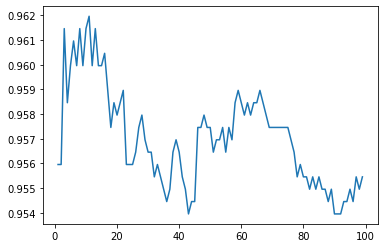

In [7]:
# your code here
x=get_features()

y=dataset1[dataset1.columns[0]]
sc_X = StandardScaler()
x = sc_X.fit_transform(x)
x= sc_X.transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =.18,random_state=0)

def knn(x,k):
  nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(x_train)
  distances, indices = nbrs.kneighbors(x_test)
  return indices
def imp(indices,k1):
  y_=[]
  hit=0
  y_hat_test = []
  for x1 in range(len(indices)):
    counter = Counter(y_train.iloc[indices[x1][1:k1+1]])
    prediction = counter.most_common()[0][0]
    
        
    
    y_hat_test.append(prediction)
  return y_hat_test

nearest1=knn(x,k=100)
nearest1
x_axis=[]
score=[]
max_score=0
point=0
for i in range(1,100,1):
  accuracy=imp(nearest1,i)
  acc=accuracy_score(y_test, accuracy)
  if(acc>max_score):
    max_score=acc
    point=i
  score.append(acc)
  x_axis.append(i)
%matplotlib inline
plt.plot(x_axis,score)
print(max_score,point)



   

          


      


  


## Part-2
Vectorize tweets based on the text. More details and reference links can be checked on the Tasks list in the start of the notebook

In [8]:
  
def tweet_vectoriser():
  """
  Funtion to return a matrix of dimensions (number of tweets, number of features extracted per tweet)
  Following are the steps for be followed:
    1. Remove links, tags and hashtags from each tweet.
    2. Apply TF-IDF on the tweets to extract a vector. 
    3. Perform dimensionality reduction on the obtained vector. 
  Input parameters to this funcion are to be chosen as per requirement (Example: Array of tweets) 
  """
  x_bag=dataset.iloc[:,3]
  x_bag=x_bag
  x_bag_after=[]
  for tweet in range(0,len(x_bag)):
    processed_tweet=re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x_bag[tweet])
    processed_tweet=re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",processed_tweet)
    processed_tweet=re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",processed_tweet)
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
    processed_tweet = re.sub(r'^RT\s+', '', processed_tweet)
    processed_tweet = processed_tweet.lower()
    x_bag_after.append(processed_tweet)
  x_bag_train=x_bag_after
  tfidfconverter = TfidfVectorizer(max_features=6000, min_df=5, max_df=0.7,stop_words='english')
  x_after_tfidf= tfidfconverter.fit_transform(x_bag_train).toarray()
  pca = PCA(n_components=20)
  pca.fit(x_after_tfidf)
  
  x_pca = pca.transform(x_after_tfidf)
  return x_pca



  # your code here

Perform KNN using the vector obtained from tweet_vectoriser() function. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

0.9334334334334334 14


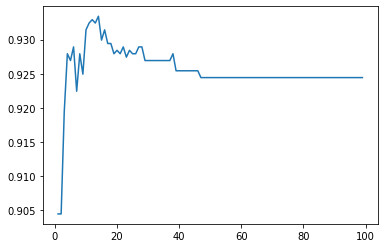

In [9]:
# your code here
x_data=tweet_vectoriser()
sc_X = StandardScaler()
x_data = sc_X.fit_transform(x_data)
x_data= sc_X.transform(x_data)
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x_data,y,test_size = .18,random_state=0)


def knn2(k2):
  nbrs = NearestNeighbors(n_neighbors=k2+1, algorithm='auto').fit(x_train_2)
  distances_2, indices_2 = nbrs.kneighbors(x_test_2)
  return indices_2
def imp(indices_2,k2):
  y_hat_test_2 = []
  for x1 in range(len(indices_2)):
    counter_2 = Counter(y_train.iloc[indices_2[x1][1:k2+1]])
    prediction_2 = counter_2.most_common()[0][0]
    
        
    
    y_hat_test_2.append(prediction_2)
  return y_hat_test_2

nearest1_2=knn2(k2=100)
x_axis_2=[]
score_2=[]
max_score_2=0
point_2=0
for i in range(1,100,1):
  accuracy_2=imp(nearest1_2,i)
  acc_2=accuracy_score(y_test_2, accuracy_2)
  if(acc_2>max_score_2):
    max_score_2=acc_2
    point_2=i
  score_2.append(acc_2)
  x_axis_2.append(i)
%matplotlib inline
plt.plot(x_axis_2,score_2)
print(max_score_2,point_2)

## Part-3
### Subpart-1

Combine both the vectors obtained from the tweet_vectoriser() and get_features()

In [10]:
# your code here
x_from_1=get_features()
x_from_2=tweet_vectoriser()
x_3=np.concatenate((x_from_1, x_from_2), axis=1)


Perform KNN using the vector obtained in the previous step. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

0.9314314314314315 13


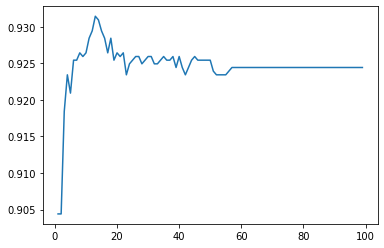

In [11]:
# your code here
sc_X = StandardScaler()
x_3= sc_X.fit_transform(x_3)
x_3 = sc_X.transform(x_3)
x_train_3,x_test_3,y_train_3,y_test_3=train_test_split(x_3,y,test_size = .18,random_state=0)


def knn3(k3):
  nbrs_3 = NearestNeighbors(n_neighbors=k3+1, algorithm='auto').fit(x_train_3)
  distances_3, indices_3 = nbrs_3.kneighbors(x_test_3)
  return indices_3
def imp(indices_3,k4):
  y_hat_test_3 = []
  for x1 in range(len(indices_3)):
    counter_3 = Counter(y_train.iloc[indices_3[x1][1:k4+1]])
    prediction_3 = counter_3.most_common()[0][0]
    
        
    
    y_hat_test_3.append(prediction_3)
  return y_hat_test_3









nearest1_3=knn3(k3=100)
x_axis_3=[]
score_3=[]
max_score_3=0
point_3=0
for i in range(1,100,1):
  accuracy_3=imp(nearest1_3,i)
  acc_3=accuracy_score(y_test_3, accuracy_3)
  score_3.append(acc_3)
  if(acc_3>max_score_3):
    max_score_3=acc_3
    point_3=i
  x_axis_3.append(i)
%matplotlib inline
plt.plot(x_axis_3,score_3)
print(max_score_3,point_3)

### Subpart-2

Explain the differences between the accuracies obtained in each part above based on the features used.

In part first the maximum accuracy is achive at k=5 and the accuracy is approx 96% . In this approch i use multiple attributes to create our model these attribute are ('truncated', 'is_quote_status', 'retweet_count', 'favorite_count', 'user_followers_count', 'user_friends_count',  'user_listed_count', 'user_favourites_count','user_verified', 'user_statuses_count')

In part second the maximum accuracy is achive at k=14 and the accuracy is approx 93% .

In part third the maximum accuracy is achive at k=23 and the accuracy in between 93-95%

In second approch the accuracy is low because in tf-idf i assume all tweets are in English, but the actual data contains tweets in multiple languages

In third approch the maximum accuracy is lower then first approch maximum accuracy because in this i combine the vector or first and second approch and the apply the model and in second approch vector i can not consider multiple language 


NOTE: The above accurace's may be change during run time because the date is break in test or train in run time.
